In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('datasets/2019.csv')
df.head()

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,TD.3,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank
0,1,Christian McCaffrey*\McCaCh01,CAR,RB,23,16,16,0,2,0,...,19,1.0,NaN,355.0,471.2,477.2,413.2,215.0,1,1.0
1,2,Lamar Jackson*\JackLa00,BAL,QB,22,15,15,265,401,3127,...,7,NaN,1.0,418.0,417.7,431.7,423.7,152.0,1,2.0
2,3,Derrick Henry*\HenrDe00,TEN,RB,25,15,15,0,0,0,...,18,NaN,NaN,277.0,294.6,303.6,285.6,136.0,2,3.0
3,4,Aaron Jones\JoneAa00,GNB,RB,25,16,16,0,0,0,...,19,NaN,NaN,266.0,314.8,322.8,290.3,125.0,3,4.0
4,5,Ezekiel Elliott*\ElliEz00,DAL,RB,24,16,16,0,0,0,...,14,NaN,NaN,258.0,311.7,319.7,284.7,117.0,4,5.0


In [4]:
df.dtypes

Rk           int64
Player      object
Tm          object
FantPos     object
Age          int64
G            int64
GS           int64
Cmp          int64
Att          int64
Yds          int64
TD           int64
Int          int64
Att.1        int64
Yds.1        int64
Y/A        float64
TD.1         int64
Tgt          int64
Rec          int64
Yds.2        int64
Y/R        float64
TD.2         int64
Fmb          int64
FL           int64
TD.3         int64
2PM        float64
2PP        float64
FantPt     float64
PPR        float64
DKPt       float64
FDPt       float64
VBD        float64
PosRank      int64
OvRank     float64
dtype: object

In [5]:
df.drop(['Rk', '2PM', '2PP', 'DKPt', 'FDPt', 'VBD', 'PosRank', 'OvRank', 'PPR', 'Fmb', 'GS'], axis = 1, inplace = True)

In [6]:
df['Player'] = df['Player'].apply(lambda x: x.split('*')[0]).apply(lambda x: x.split('\\')[0])

In [8]:
df

,Player,Tm,FantPos,Age,G,Cmp,Att,Yds,TD,Int,...,Y/A,TD.1,Tgt,Rec,Yds.2,Y/R,TD.2,FL,TD.3,FantPt
0,Christian McCaffrey,CAR,RB,23,16,0,2,0,0,0,...,4.83,15,142,116,1005,8.66,4,0,19,355.0
1,Lamar Jackson,BAL,QB,22,15,265,401,3127,36,6,...,6.85,7,0,0,0,NaN,0,2,7,418.0
2,Derrick Henry,TEN,RB,25,15,0,0,0,0,0,...,5.08,16,24,18,206,11.44,2,3,18,277.0
3,Aaron Jones,GNB,RB,25,16,0,0,0,0,0,...,4.59,16,68,49,474,9.67,3,2,19,266.0
4,Ezekiel Elliott,DAL,RB,24,16,0,0,0,0,0,...,4.51,12,71,54,420,7.78,2,2,14,258.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Ray-Ray McCloud,CAR,NaN,23,6,0,0,0,0,0,...,NaN,0,0,0,0,NaN,0,1,0,-2.0
599,Darrius Shepherd,GNB,WR,24,6,0,0,0,0,0,...,NaN,0,2,1,1,1.00,0,1,0,-2.0
600,Jarrett Stidham,NWE,QB,23,3,2,4,14,0,1,...,-1.00,0,0,0,0,NaN,0,0,0,-2.0
601,Michael Walker,JAX,WR,23,7,0,0,0,0,0,...,NaN,0,3,2,15,7.50,0,2,0,-3.0


In [10]:
df.rename({
    'TD': 'PassingTD',
    'TD.1': 'RushingTD',
    'TD.2': 'ReceivingTD',
    'TD.3': 'TotalTD',
    'Yds': 'PassingYDs',
    'Yds.1': 'RushingYDs',
    'Yds.2': 'ReceivingYDs',
    'Att': 'PassingAtt',
    'Att.1': 'RushingAtt'   
}, axis = 1, inplace = True)

In [11]:
df

,Player,Tm,FantPos,Age,G,Cmp,PassingAtt,PassingYDs,PassingTD,Int,...,Y/A,RushingTD,Tgt,Rec,ReceivingYDs,Y/R,ReceivingTD,FL,TotalTD,FantPt
0,Christian McCaffrey,CAR,RB,23,16,0,2,0,0,0,...,4.83,15,142,116,1005,8.66,4,0,19,355.0
1,Lamar Jackson,BAL,QB,22,15,265,401,3127,36,6,...,6.85,7,0,0,0,NaN,0,2,7,418.0
2,Derrick Henry,TEN,RB,25,15,0,0,0,0,0,...,5.08,16,24,18,206,11.44,2,3,18,277.0
3,Aaron Jones,GNB,RB,25,16,0,0,0,0,0,...,4.59,16,68,49,474,9.67,3,2,19,266.0
4,Ezekiel Elliott,DAL,RB,24,16,0,0,0,0,0,...,4.51,12,71,54,420,7.78,2,2,14,258.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Ray-Ray McCloud,CAR,NaN,23,6,0,0,0,0,0,...,NaN,0,0,0,0,NaN,0,1,0,-2.0
599,Darrius Shepherd,GNB,WR,24,6,0,0,0,0,0,...,NaN,0,2,1,1,1.00,0,1,0,-2.0
600,Jarrett Stidham,NWE,QB,23,3,2,4,14,0,1,...,-1.00,0,0,0,0,NaN,0,0,0,-2.0
601,Michael Walker,JAX,WR,23,7,0,0,0,0,0,...,NaN,0,3,2,15,7.50,0,2,0,-3.0


In [13]:
rb_df = df[df['FantPos'] =='RB']
qb_df = df[df['FantPos'] =='QB']
wr_df = df[df['FantPos'] =='WR']
te_df = df[df['FantPos'] =='TE']

In [14]:
rb_df.head()

,Player,Tm,FantPos,Age,G,Cmp,PassingAtt,PassingYDs,PassingTD,Int,...,Y/A,RushingTD,Tgt,Rec,ReceivingYDs,Y/R,ReceivingTD,FL,TotalTD,FantPt
0,Christian McCaffrey,CAR,RB,23,16,0,2,0,0,0,...,4.83,15,142,116,1005,8.66,4,0,19,355.0
2,Derrick Henry,TEN,RB,25,15,0,0,0,0,0,...,5.08,16,24,18,206,11.44,2,3,18,277.0
3,Aaron Jones,GNB,RB,25,16,0,0,0,0,0,...,4.59,16,68,49,474,9.67,3,2,19,266.0
4,Ezekiel Elliott,DAL,RB,24,16,0,0,0,0,0,...,4.51,12,71,54,420,7.78,2,2,14,258.0
5,Dalvin Cook,MIN,RB,24,14,0,0,0,0,0,...,4.54,13,63,53,519,9.79,0,2,13,239.0


In [15]:
rushing_cols = ['RushingAtt', 'RushingYDs', 'Y/A', 'RushingTD']
receiving_cols = ['Tgt', 'Rec', 'ReceivingYDs', 'Y/R', 'ReceivingTD']

In [16]:
def transform_columns(df, new_column_list):
    df = df[['Player', 'Tm', 'Age', 'G', 'FantPt'] + new_column_list + ['FL']]
    return df

In [18]:
rb_df = transform_columns(rb_df, rushing_cols + receiving_cols) 

In [19]:
rb_df['FantasyPoints'] = (rb_df['RushingYDs']*0.1 + rb_df['RushingTD']*6+ rb_df['ReceivingYDs']*0.1 + rb_df ['ReceivingTD']*6 - rb_df['FL']*2)
rb_df['Total Usage'] = (rb_df['RushingAtt'] + rb_df['Tgt'])
rb_df = rb_df[rb_df['RushingAtt'] > 20]

In [20]:
x = rb_df['Total Usage'].values.reshape(-1,1)
y = rb_df['FantasyPoints'].values.reshape(-1,1)
xtrain, xtest, ytrain, ytest = tts(x,y, test_size = 0.2, random_state = 0)

In [21]:
regressor = LinearRegression()

In [22]:
regressor.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
ypred = regressor.predict(xtest)

In [28]:
data = pd.DataFrame({'Actual': ytest.flatten(), 'Predicted': ypred.flatten()})
data.head()

,Actual,Predicted
0,265.8,199.907703
1,111.1,95.167927
2,143.2,171.037124
3,165.3,173.051350
4,171.6,176.408394


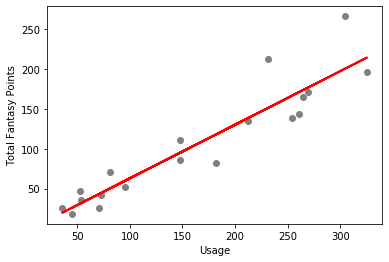

In [29]:
plt.scatter(xtest, ytest, color = 'gray')
plt.plot(xtest, ypred, color = 'red', linewidth = 2)
plt.xlabel('Usage')
plt.ylabel('Total Fantasy Points')
plt.show()

In [30]:
rb_df

,Player,Tm,Age,G,FantPt,RushingAtt,RushingYDs,Y/A,RushingTD,Tgt,Rec,ReceivingYDs,Y/R,ReceivingTD,FL,FantasyPoints,Total Usage
0,Christian McCaffrey,CAR,23,16,355.0,287,1387,4.83,15,142,116,1005,8.66,4,0,353.2,429
2,Derrick Henry,TEN,25,15,277.0,303,1540,5.08,16,24,18,206,11.44,2,3,276.6,327
3,Aaron Jones,GNB,25,16,266.0,236,1084,4.59,16,68,49,474,9.67,3,2,265.8,304
4,Ezekiel Elliott,DAL,24,16,258.0,301,1357,4.51,12,71,54,420,7.78,2,2,257.7,372
5,Dalvin Cook,MIN,24,14,239.0,250,1135,4.54,13,63,53,519,9.79,0,2,239.4,313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,Darrell Henderson,LAR,22,13,18.0,39,147,3.77,0,6,4,37,9.25,0,0,18.4,45
359,Wendell Smallwood,WAS,25,15,15.0,22,81,3.68,0,13,9,64,7.11,0,0,14.5,35
362,Trey Edmunds,PIT,25,11,14.0,22,92,4.18,0,7,6,48,8.00,0,0,14.0,29
373,Kerrith Whyte,PIT,23,6,13.0,24,122,5.08,0,1,1,9,9.00,0,0,13.1,25
